In [ ]:
from sklearn import datasets # import this to load the datasets
from sklearn import svm # import the classification model
from sklearn import model_selection # to load function for train test split
from sklearn import metrics # to evaluate performance of the model

In [ ]:
data = datasets.load_iris()
x = data.data
y = data.target

Xtrain,Xtest,ytrain,ytest = model_selection.train_test_split(x,y,test_size=0.3,random_state=5)
print(Xtrain.shape,ytrain.shape)
print(Xtest.shape,ytest.shape )

(105, 4) (105,)
(45, 4) (45,)


In [ ]:
clf_model = svm.SVC(kernel='poly',gamma='scale') # classification model

# train the model using the trianing data (Xtrain) and its respective labels (ytrain)
clf_model = clf_model.fit(Xtrain,ytrain)


# predict the labels of the testing dataset
# pass the test data (Xtest) in the trained model
ypred = clf_model.predict(Xtest)


print(ypred.shape)
print(ytest.shape)

(45,)
(45,)


In [ ]:
acc = metrics.accuracy_score(ypred,ytest)

conf_matrix = metrics.confusion_matrix(ypred,ytest)

report = metrics.classification_report(ypred,ytest)

print('Accuracy of the system: ', acc)
print(' Confusion matrix of the model ')
print(conf_matrix)
print("Complete report ")
print(report)

Accuracy of the system:  0.9777777777777777
 Confusion matrix of the model 
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
Complete report 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/diabetes.csv')
print(data.shape)
data.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
x = data.drop('Outcome',axis=1,inplace=False)
y = data['Outcome']

print(x.shape,y.shape)
# x will be holding all feartues column and y will be holding label column
Xtrain,Xtest,ytrain,ytest = model_selection.train_test_split(x,y,test_size=0.3,random_state=5)
print(Xtrain.shape,ytrain.shape)
print(Xtest.shape,ytest.shape )


(768, 8) (768,)
(537, 8) (537,)
(231, 8) (231,)


In [ ]:
clf_model = svm.SVC(kernel='linear',gamma='scale') # classification model

# train the model using the trianing data (Xtrain) and its respective labels (ytrain)
clf_model = clf_model.fit(Xtrain,ytrain)


# predict the labels of the testing dataset
# pass the test data (Xtest) in the trained model
ypred = clf_model.predict(Xtest)


print(ypred.shape)
print(ytest.shape)

(231,)
(231,)


In [ ]:
acc = metrics.accuracy_score(ypred,ytest)

conf_matrix = metrics.confusion_matrix(ypred,ytest)

report = metrics.classification_report(ypred,ytest)

print('Accuracy of the system: ', acc)
print(' Confusion matrix of the model ')
print(conf_matrix)
print("Complete")
print(report)

Accuracy of the system:  0.7965367965367965
 Confusion matrix of the model 
[[134  21]
 [ 26  50]]
Complete
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       155
           1       0.70      0.66      0.68        76

    accuracy                           0.80       231
   macro avg       0.77      0.76      0.77       231
weighted avg       0.79      0.80      0.79       231



In [ ]:
#perform eda on the diabetets dataset
# exploratory data anayslsi
import matplotlib.pyplot as plt
import seaborn as sns

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
notDiabatic = data['Outcome']==0
t1=data[notDiabatic]
Diabatic = data['Outcome']==1
t2=data[Diabatic]
print(t1.size,t2.size)

4500 2412


In [ ]:
columns=[data.columns]
columns[0][2]
len(columns[0])

9

<Axes: ylabel='SkinThickness'>

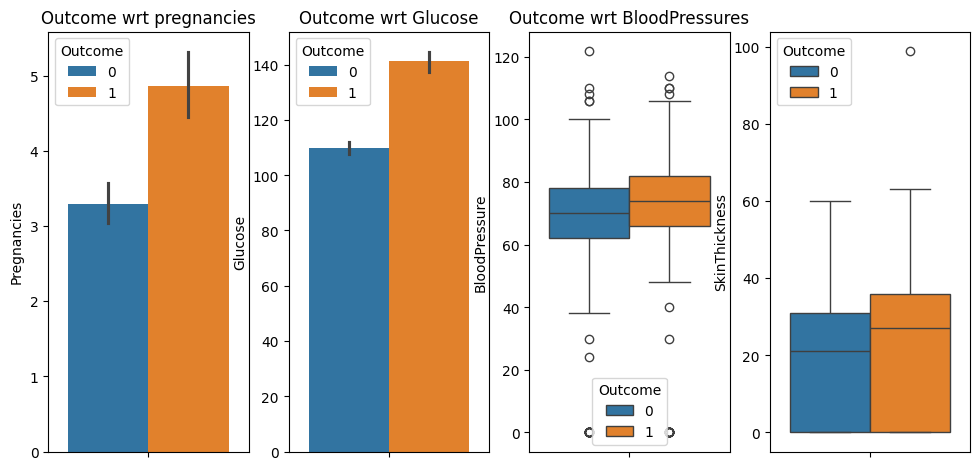

In [ ]:
plt.figure(1,(15,12))
plt.subplot(2,5,1)
sns.barplot(data = data,y=data['Pregnancies'],hue = data['Outcome'])
plt.title('Outcome wrt pregnancies')

plt.subplot(2,5,2)
sns.barplot(data = data,y=data['Glucose'],hue = data['Outcome'])
plt.title('Outcome wrt Glucose')

plt.subplot(2,5,3)
sns.boxplot(data = data,y=data['BloodPressure'],hue = data['Outcome'])
plt.title('Outcome wrt BloodPressures')

plt.subplot(2,5,4)
sns.boxplot(data = data,y=data['SkinThickness'],hue = data['Outcome'])


<Axes: xlabel='Age_category', ylabel='count'>

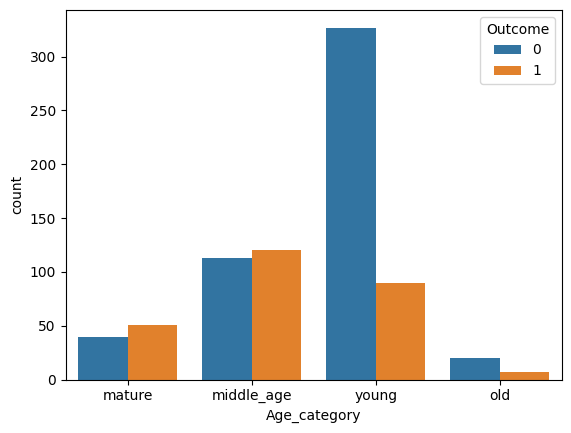

In [ ]:
#young = <=30
#middle age >=31 & <=45
#mature >=46 & <=65
#old>65
# data['Age_catogory']=data['Age'].copy
data['Age_category']=''
data.head()


young=data['Age']<=30

middle_age = (data['Age']>=31)&(data['Age']<=45)
mature = (data['Age']>=46)&(data['Age']<=65)
old = data['Age']>60

data.loc[young,'Age_category']="young"
data.loc[mature,'Age_category']="mature"
data.loc[middle_age,'Age_category']="middle_age"
data.loc[old,'Age_category']="old"

data.head()

sns.countplot(data=data,x='Age_category',hue='Outcome')

In [ ]:
matrix = np.zeros((3,3))
x = data.drop('Outcome',axis=1,inplace=False)
y = data['Outcome']


# print(x.shape,y.shape)

# Xtrain,Xtest,ytrain,ytest = model_selection.train_test_split(x,y,test_size=0.3,random_state=5)
# col=['rbf','linear','poly']
# for i in range(matrix.shape[0]):
#     j=1
#     while(j<=matrix.shape[0]):
#       clf_model = svm.SVC(kernel=col[j],gamma='scale',C=i+1)

#       clf_model = clf_model.fit(Xtrain,ytrain)
#       ypred = clf_model.predict(Xtest)

#       acc = metrics.accuracy_score(ypred,ytest)
#       matrix[i][j]=acc

# print(matrix)

In [ ]:
data = pd.read_csv('/content/Fish.csv')
data.head()
data.info()
print(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB
    Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.090

In [ ]:
a=data['Weight'].unique()
print(a.size)

101


<Axes: ylabel='Weight'>

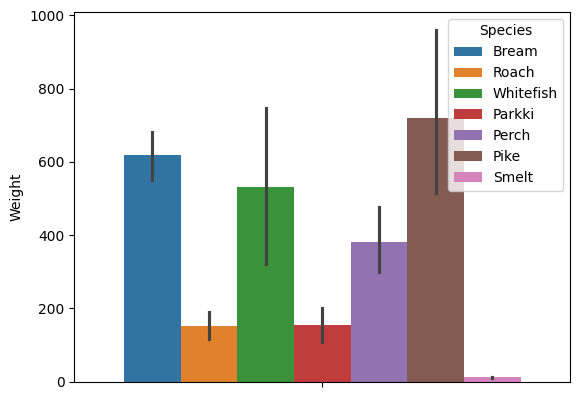

In [ ]:
x=data.drop('Width',axis=1,inplace=False)
y=data['Width']
plt.figure(1)
sns.barplot(data=data,hue=data['Species'],y=data['Weight'])


(159, 6) (159,)
          rbf    linear      poly
c=1  0.479167  0.854167  0.312500
c=2  0.437500  0.875000  0.312500
c=3  0.437500  0.854167  0.333333


<Axes: >

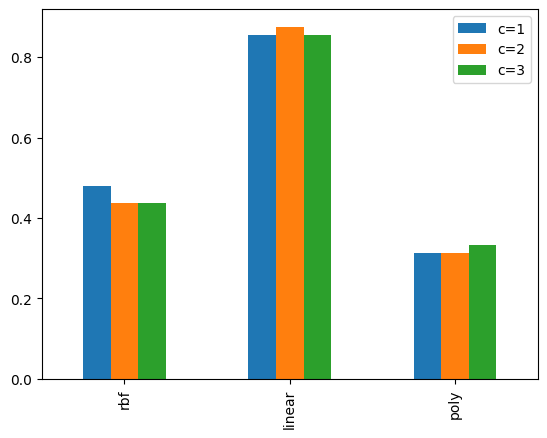

In [ ]:
matrix = np.zeros((3,3))
x = data.drop('Species',axis=1,inplace=False)
y = data['Species']


print(x.shape,y.shape)

Xtrain,Xtest,ytrain,ytest = model_selection.train_test_split(x,y,test_size=0.3,random_state=5)
col=['rbf','linear','poly']
for i in range(matrix.shape[0]):
    j=0
    while(j<matrix.shape[0]):

      clf_model = svm.SVC(kernel=col[j],gamma='scale',C=i+1)

      clf_model = clf_model.fit(Xtrain,ytrain)
      ypred = clf_model.predict(Xtest)

      acc = metrics.accuracy_score(ypred,ytest)
      matrix[i][j]=acc
      j=j+1

# print(matrix)
r=pd.DataFrame(data=matrix,columns=col,index=['c=1','c=2','c=3'])
print(r)
r.T.plot(kind='bar')